Based on:

Campana LM, Owens RL, Clifford GD, Pittman SD, Malhotra A.
Phase-rectified signal averaging as a sensitive index of autonomic changes with aging. 
J Appl Physiol (1985). 
2010;108(6):1668-1673. doi:10.1152/japplphysiol.00013.2010

In [14]:
PATH = '' # Where the repository was cloned
import sys
sys.path.append(PATH)

import numpy as np
import pandas as pd
import neurokit2 as nk

from prsa.prsa import perform_rr_based_prsa
from prsa.segmentation import calculate_anchor_neighbours
from prsa.signal_preprocessing import clean_rr_intervals_by_derivative
from prsa.anchor_point_identification import detect_anchors_from_rr_acc, detect_anchors_from_rr_dc
from prsa.visualization_tools import plot_signal, plot_rr_intervals, plot_rr_intervals_with_anchors, plot_all_anchors_with_neighbours, plot_subset_of_anchors_with_neighbours

In [15]:
data_path = "" #Path to signal

#Loading logic
data = pd.read_csv(data_path)
data = data[data["ID"] == "OCH_37"].copy()
data.reset_index(drop=True, inplace=True)

data['Values'].interpolate(method='linear', inplace=True)

time, signal = data["TimeSteps"], data["Values"]

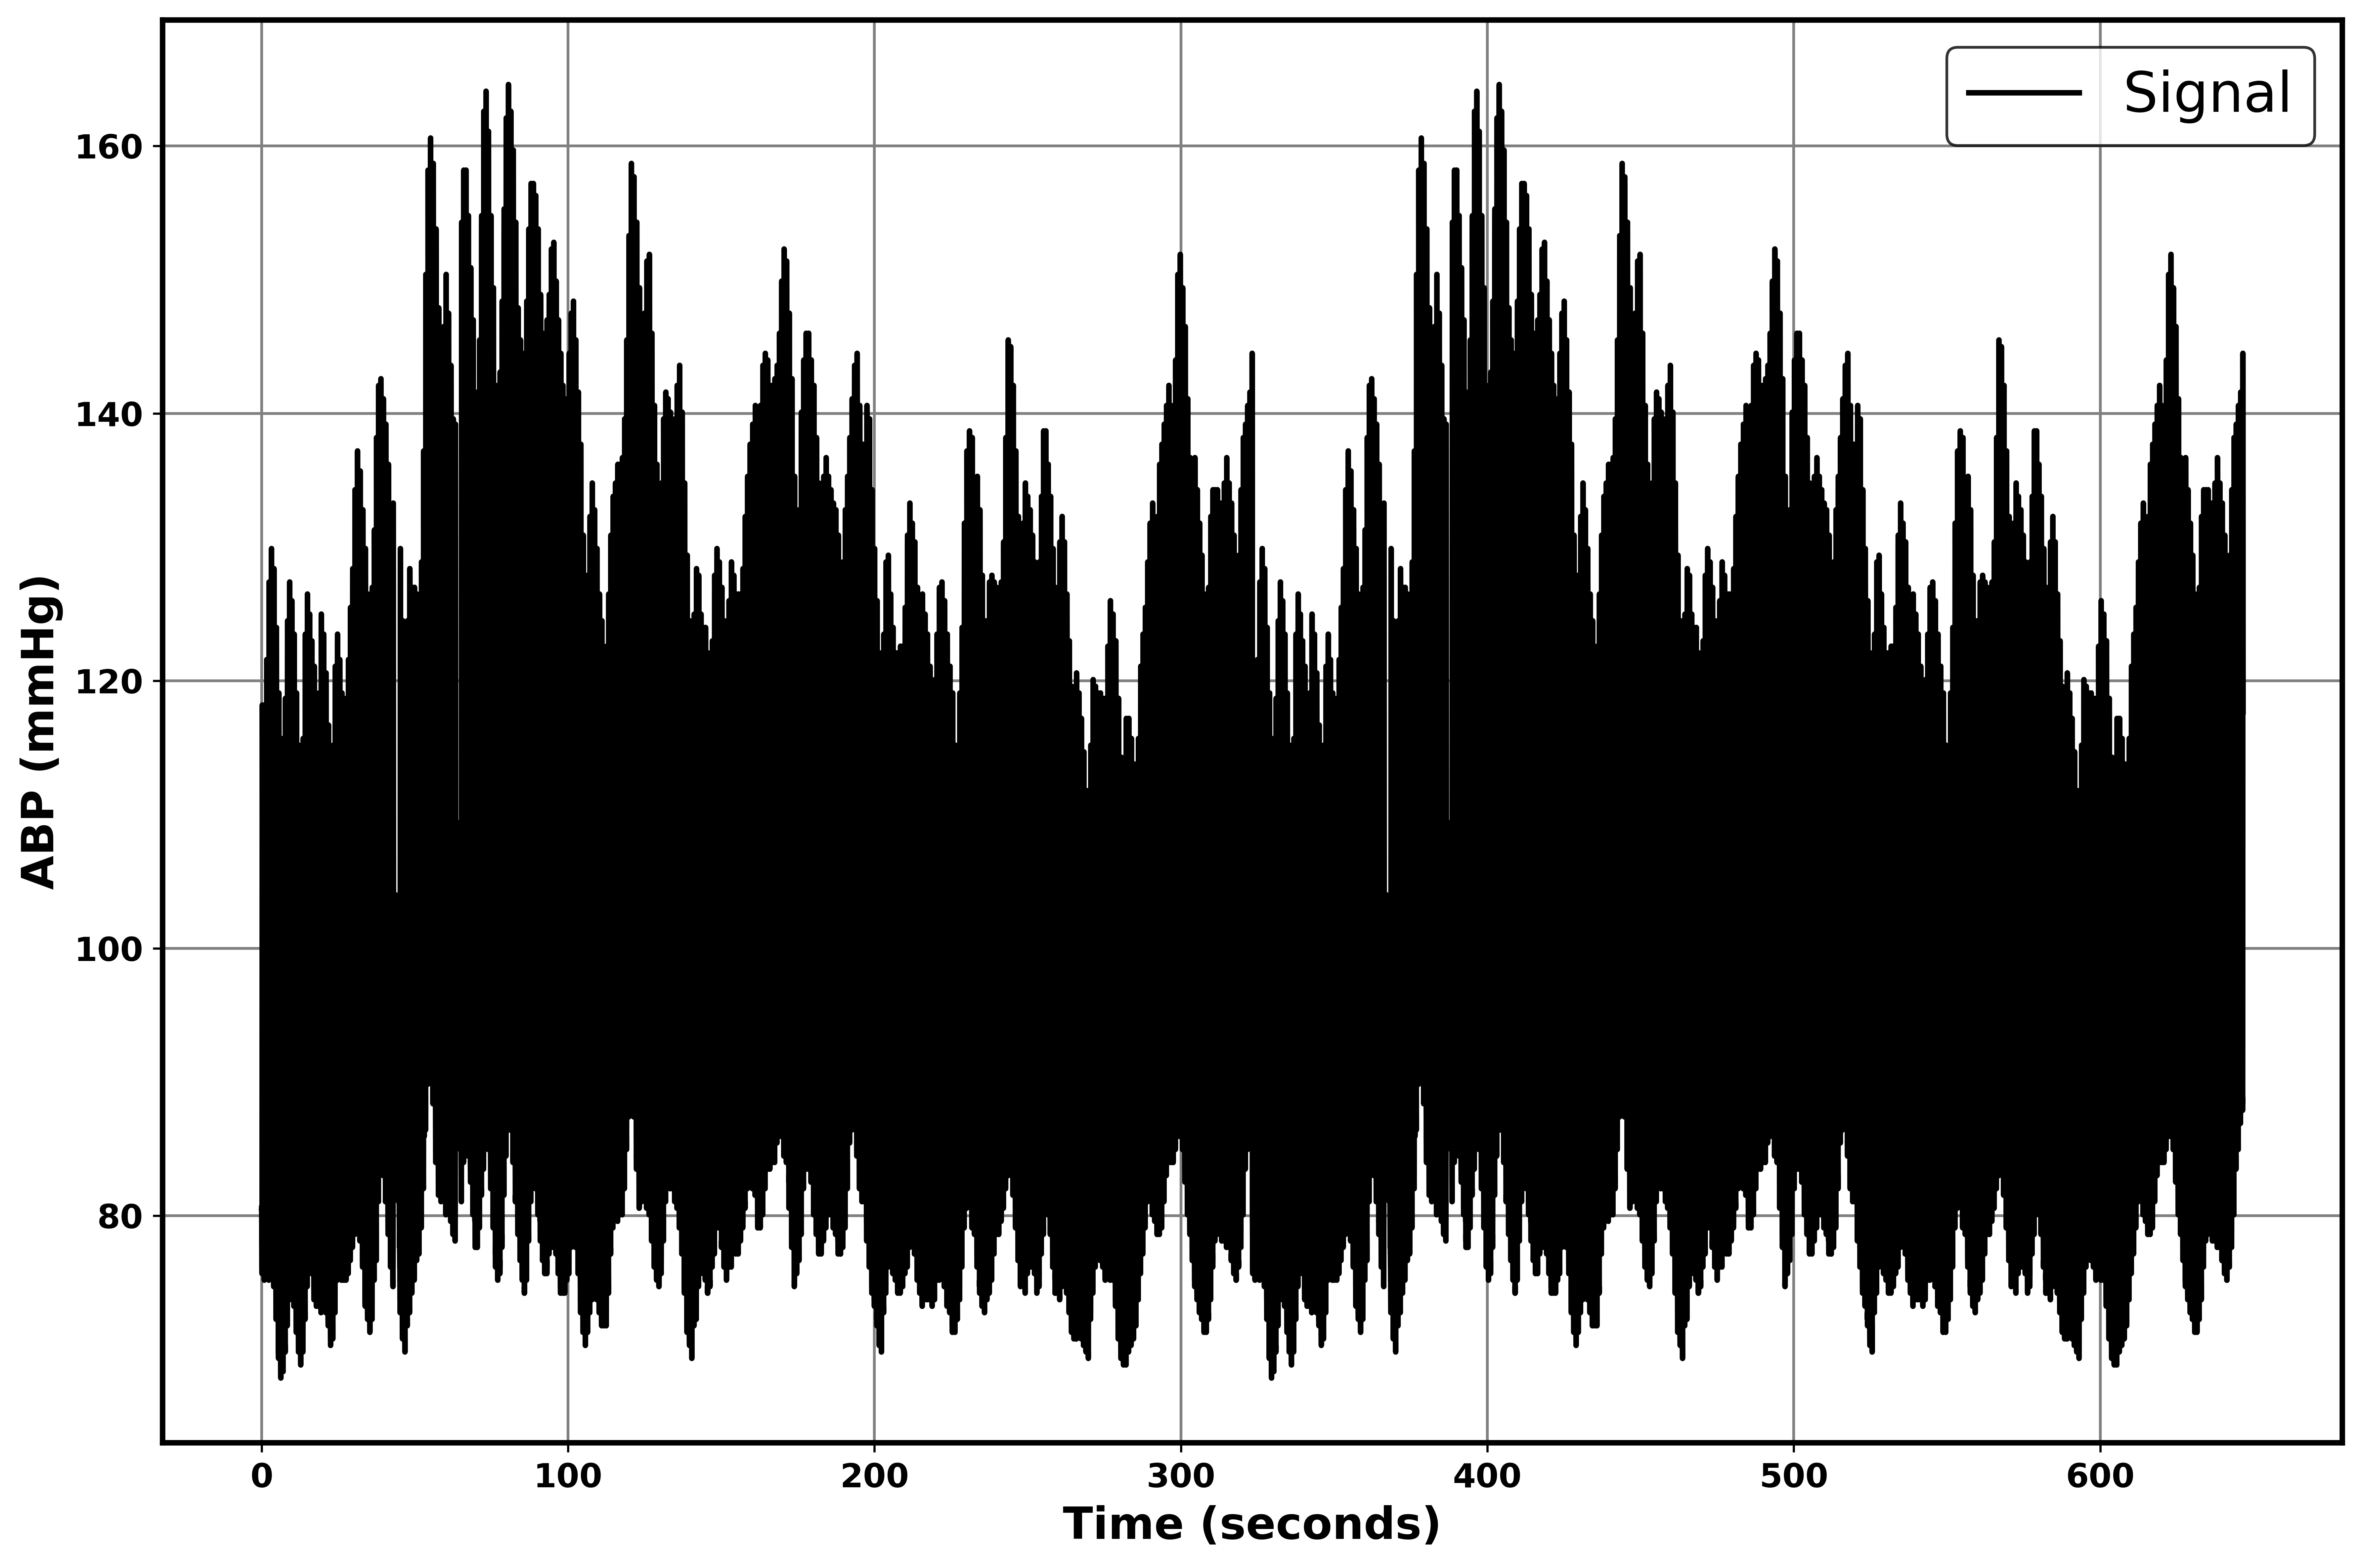

In [16]:
plot_signal(signal)

In [17]:
sampling_rate = 200

cleaned_signal = nk.ppg_clean(signal, sampling_rate=sampling_rate, method='elgendi')
peaks_info = nk.ppg_findpeaks(cleaned_signal, sampling_rate=sampling_rate, method='elgendi', mindelay=0.6)

r_peaks = peaks_info['PPG_Peaks']
rr_intervals = np.diff(r_peaks) / sampling_rate * 1000 

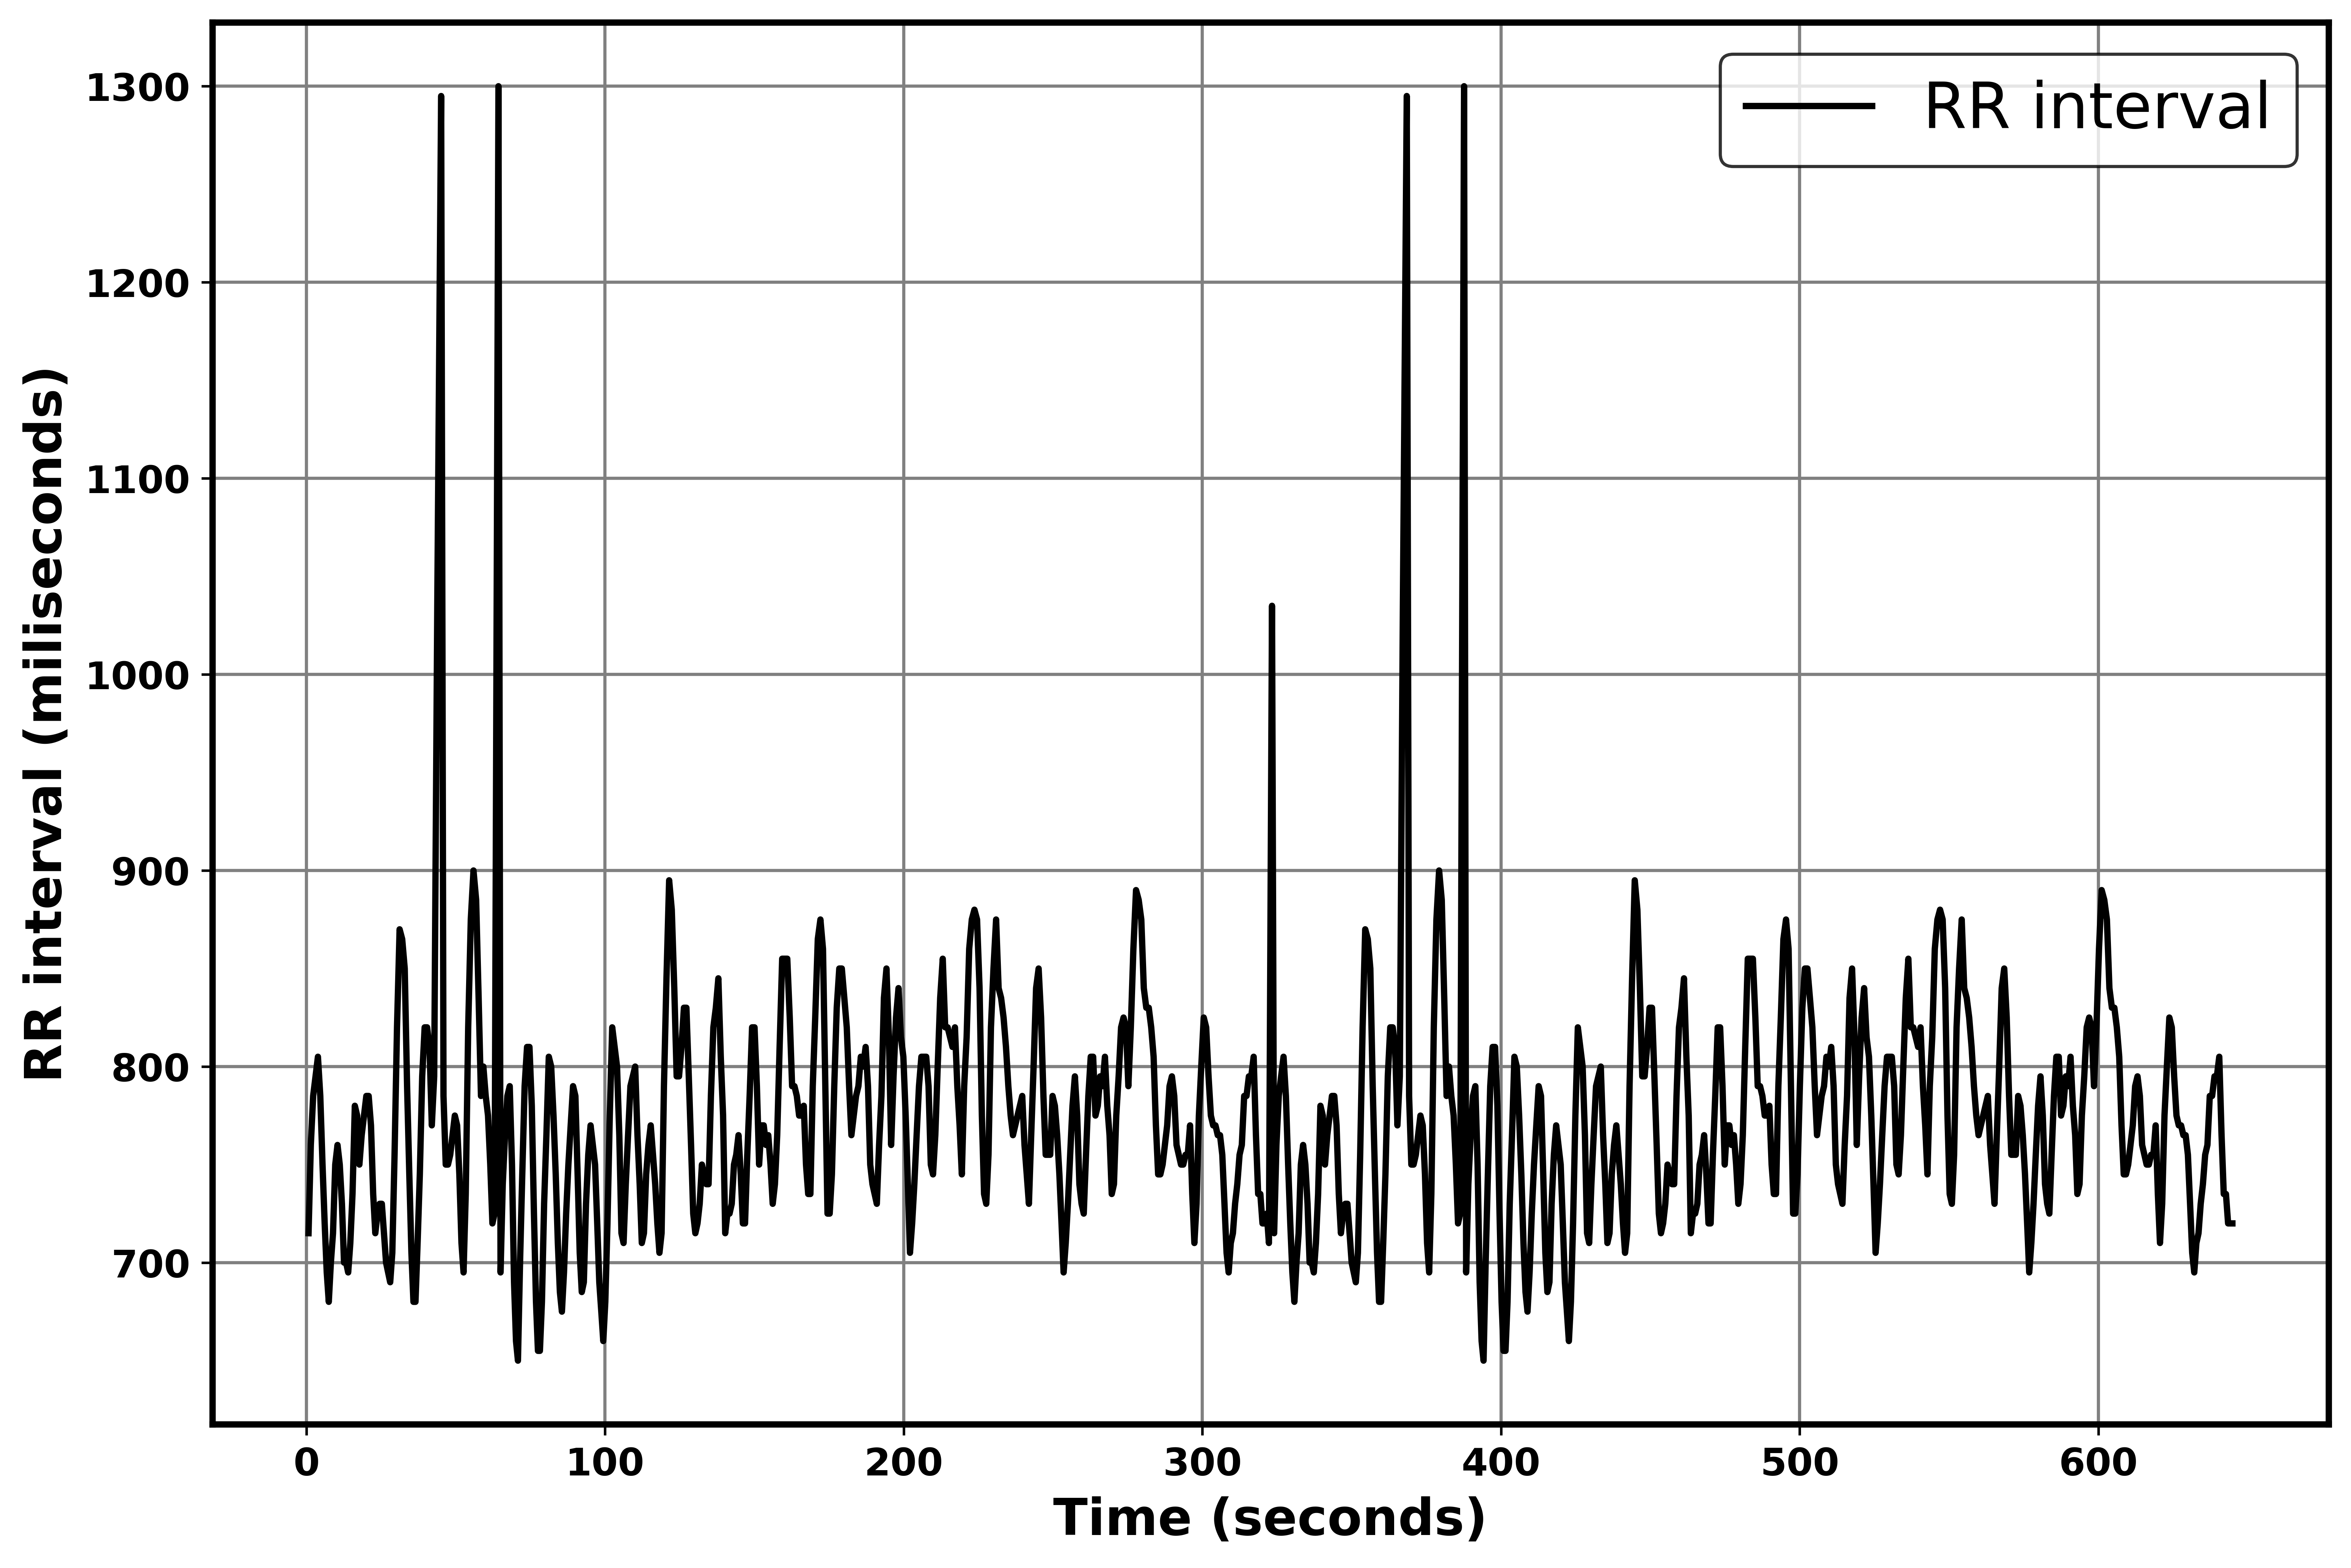

In [18]:
plot_rr_intervals(rr_intervals)

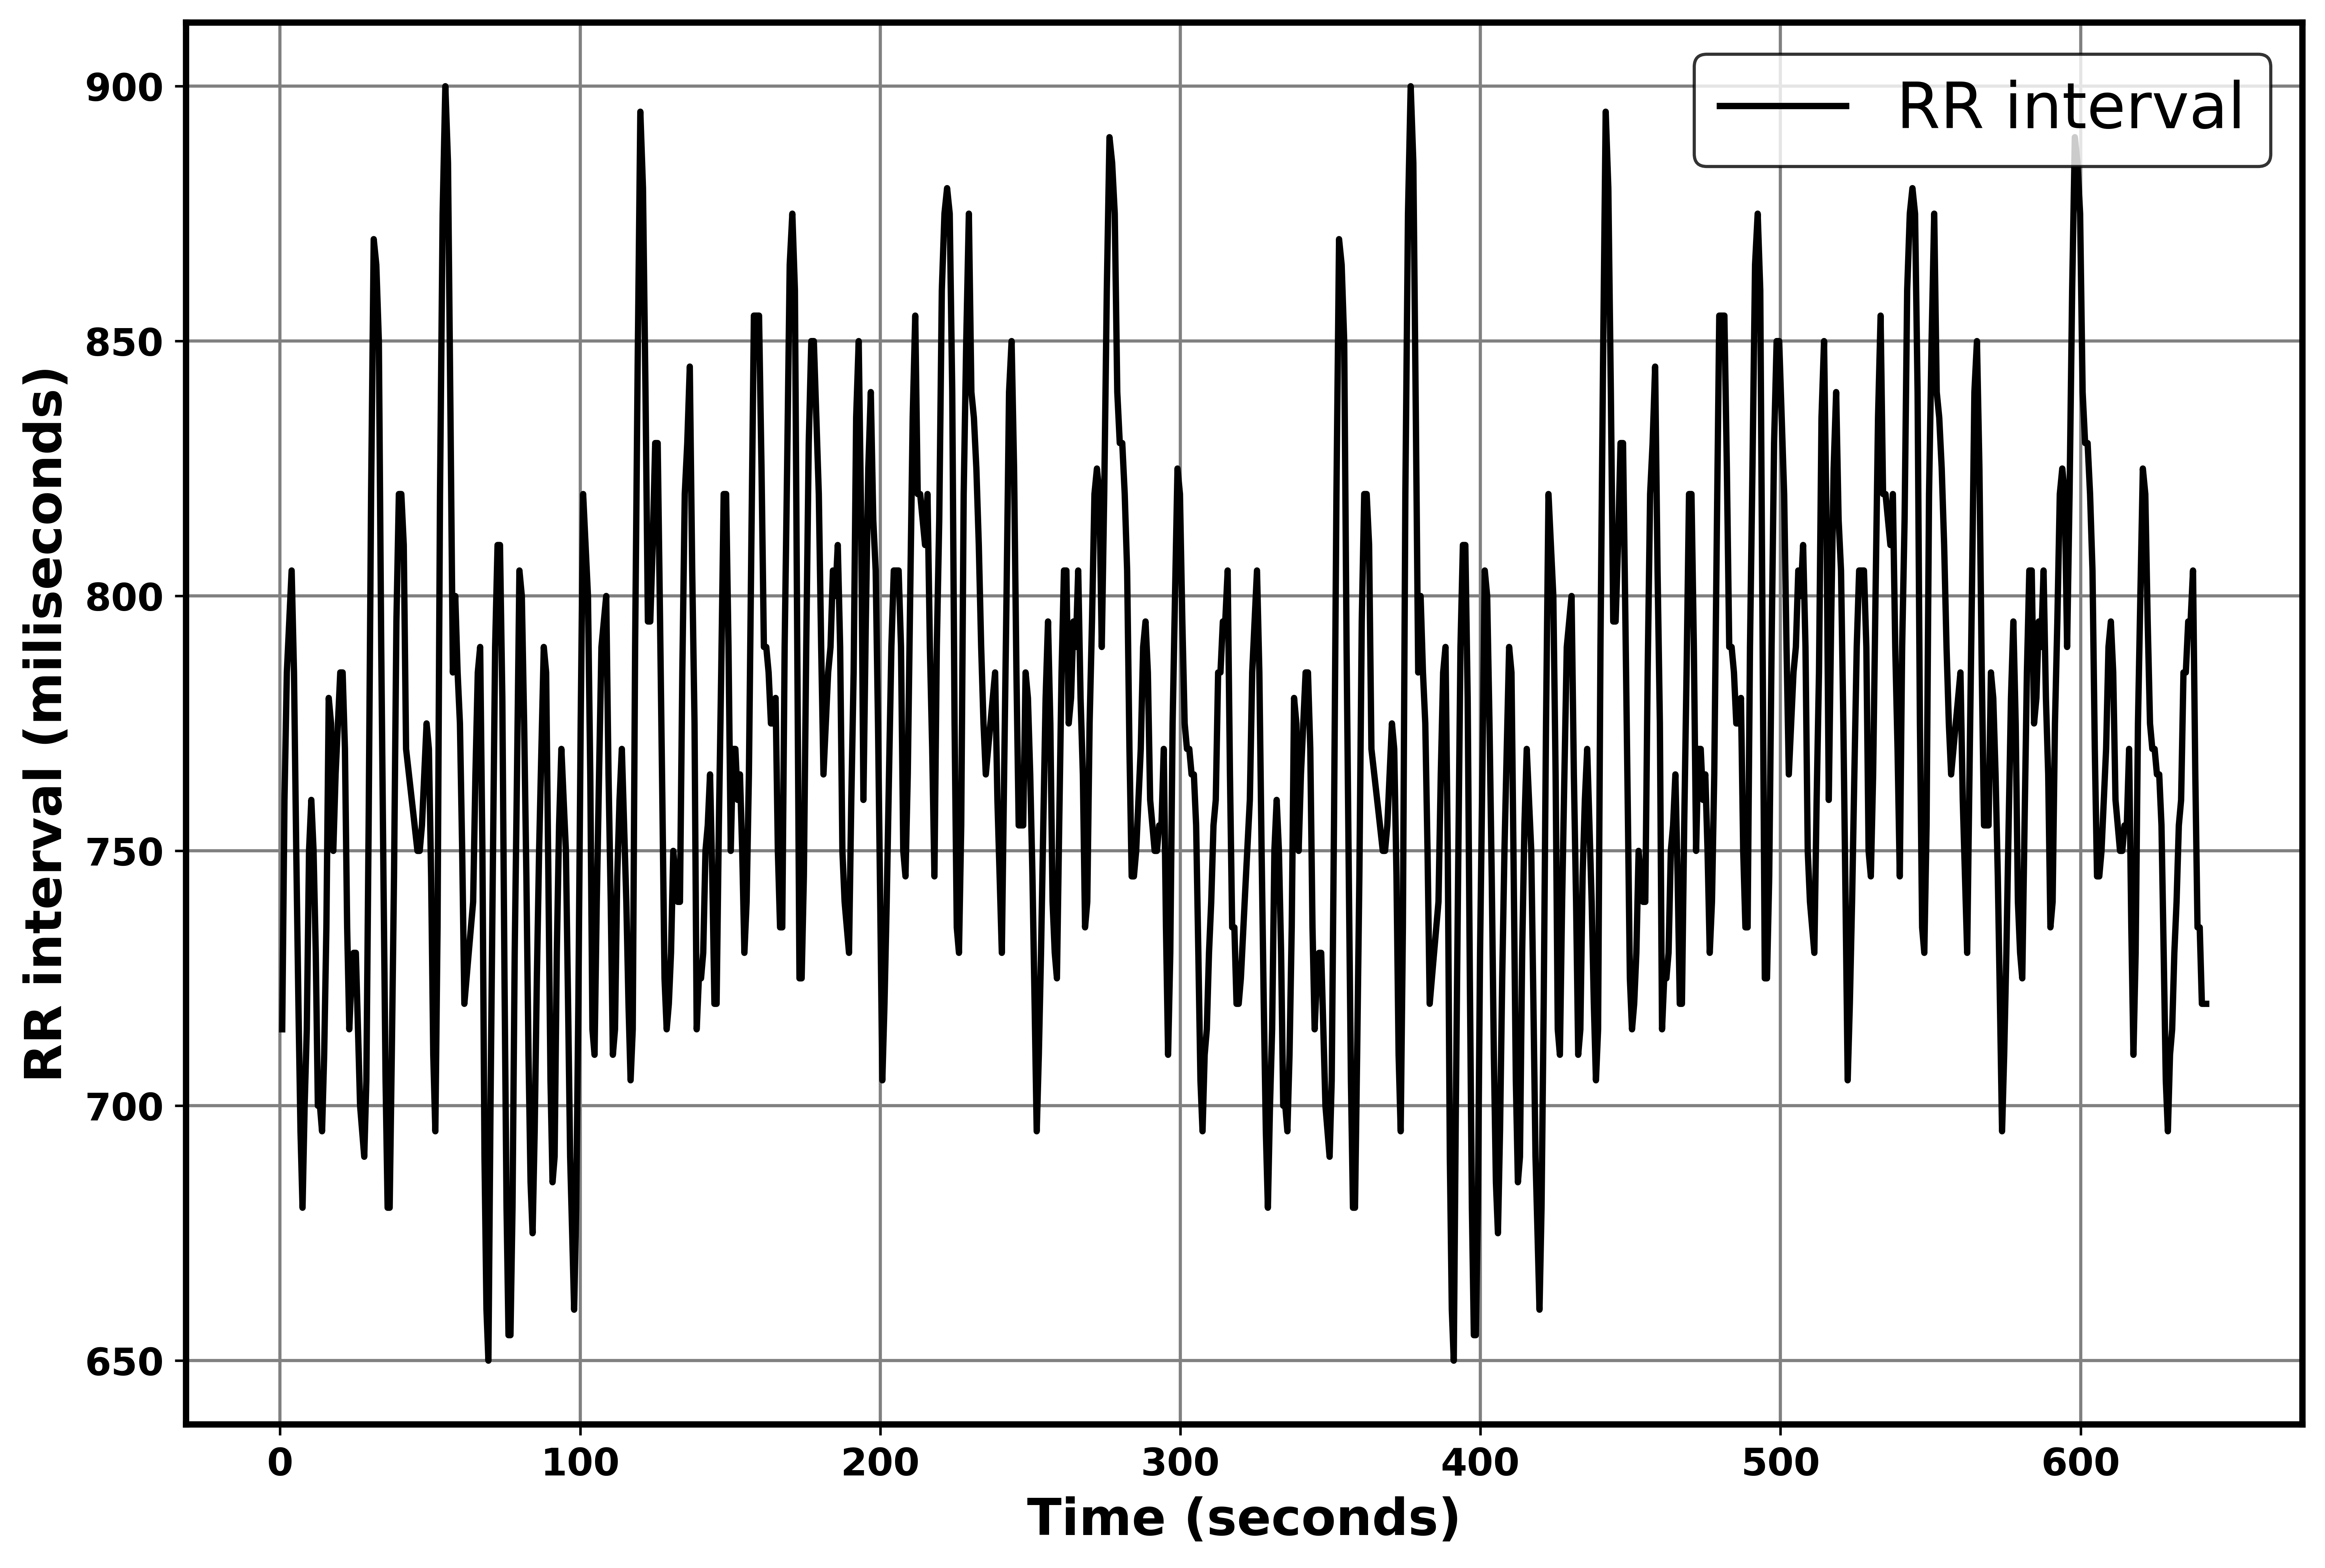

In [19]:
rr_intervals = clean_rr_intervals_by_derivative(rr_intervals)
plot_rr_intervals(rr_intervals)

In [20]:
start_time = 150
end_time = 250

In [21]:
T = 3
idx_anchors_acc = detect_anchors_from_rr_acc(rr_intervals, T)
idx_anchors_dc = detect_anchors_from_rr_dc(rr_intervals, T)

In [22]:
segments_array, prsa_output_acc = perform_rr_based_prsa(rr_intervals, idx_anchors_acc, T)
segments_array, prsa_output_dc = perform_rr_based_prsa(rr_intervals, idx_anchors_dc, T)

In [23]:
anchor_neighbours_acc = calculate_anchor_neighbours(rr_intervals, idx_anchors_acc, T)
anchor_neighbours_dc = calculate_anchor_neighbours(rr_intervals, idx_anchors_dc, T)

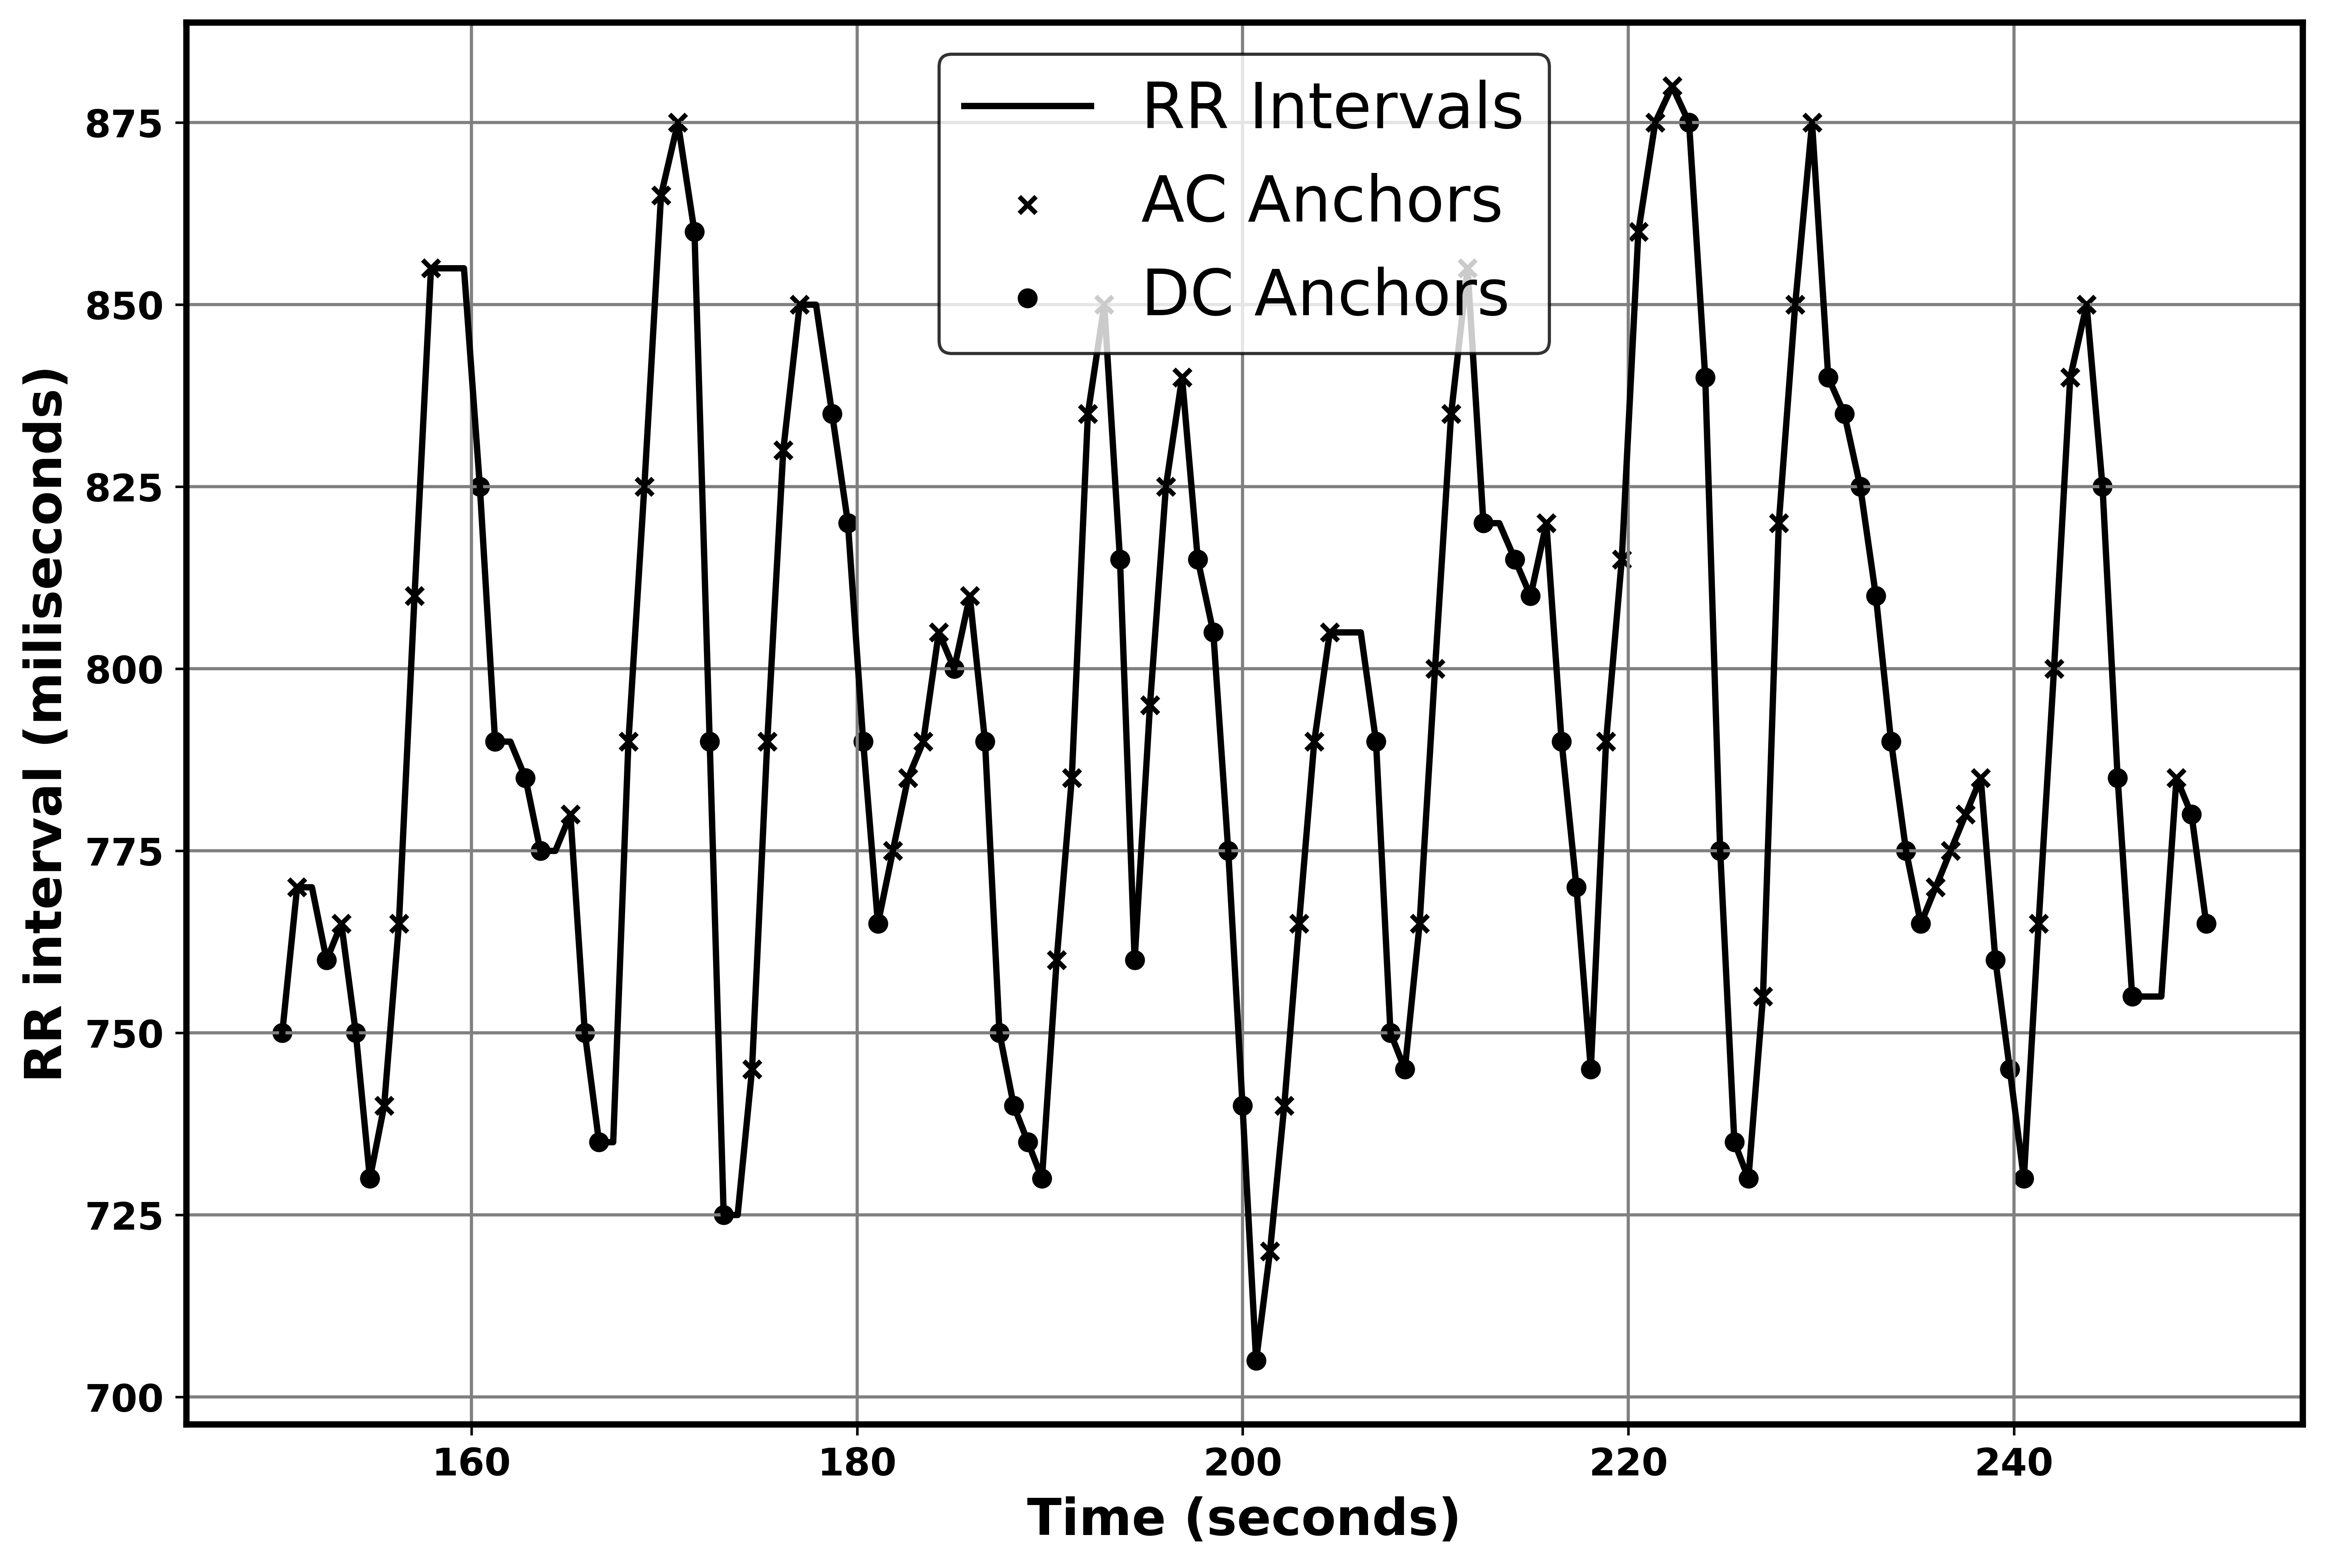

In [24]:
plot_rr_intervals_with_anchors(np.cumsum(rr_intervals), rr_intervals, idx_anchors_acc, 
                               idx_anchors_dc, start_time, end_time)

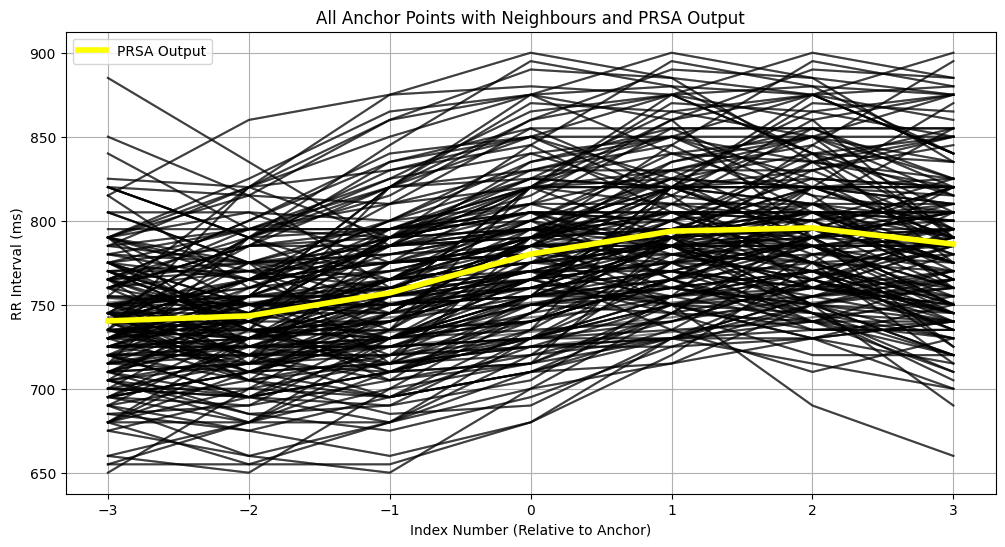

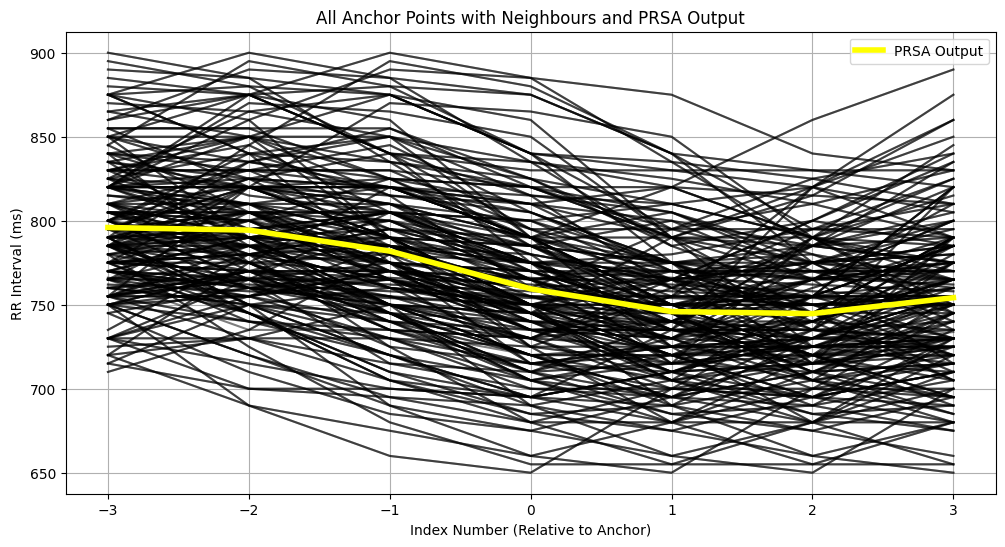

In [25]:
plot_all_anchors_with_neighbours(anchor_neighbours_acc, prsa_output_acc, T, True)
plot_all_anchors_with_neighbours(anchor_neighbours_dc, prsa_output_dc, T, True)

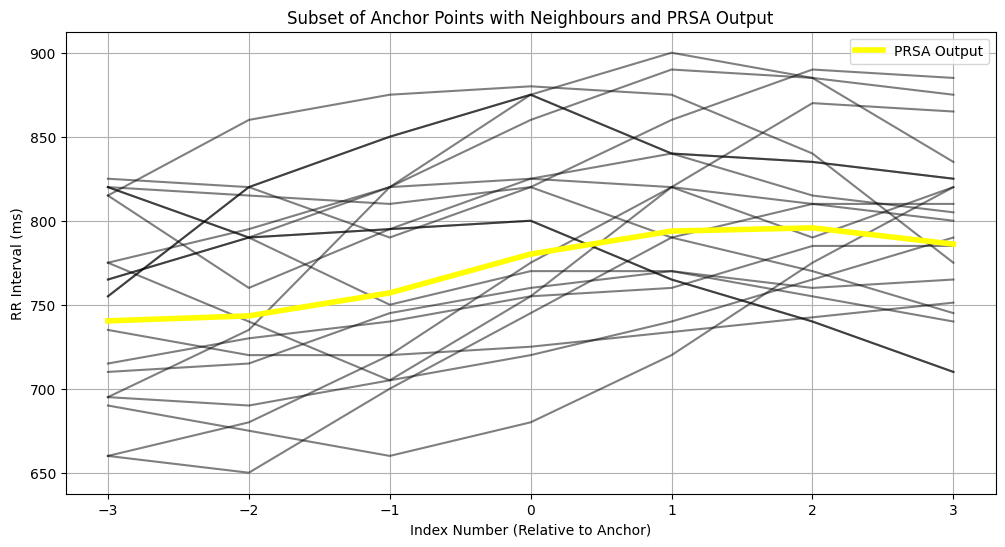

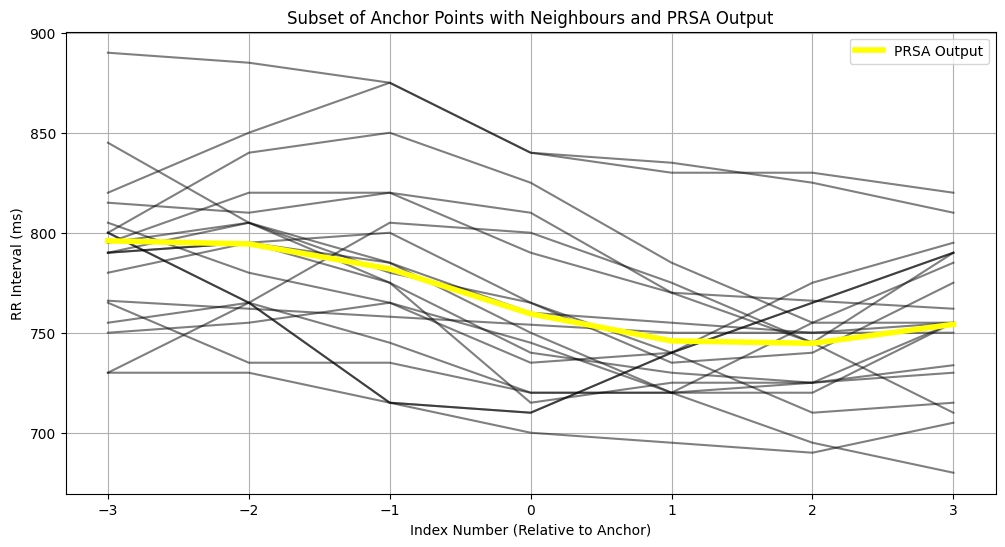

In [26]:
plot_subset_of_anchors_with_neighbours(anchor_neighbours_acc, prsa_output_acc, T, 20, True)
plot_subset_of_anchors_with_neighbours(anchor_neighbours_dc, prsa_output_dc, T, 20, True)